In [11]:

from math import *
import numpy as np
import matplotlib.pyplot as plt

colors={'brown':(200/255.,154/255.,125/255.),\
        'green':(0,151/255.,78/255.),\
        'blue':(0,120/255.,180/255.),\
        'yellow':(1., 215/255., 0),\
        'black':(0.,0.,0.)}

def Squeezing_spectrum(kappa,rb,L,delta,phi,ktau,theta,x,nu,leng):
    "Returns the squeezing spectrum of a given parameter set"
    ## Useful parameters ##
    k     = 2*sqrt(rb*(1-rb)*(1-L/100))*kappa
    tau   = ktau/kappa
    kapb  = kappa*rb
    eps   = kappa*x
    Delta = delta*kappa
    
    ## Pre-allocation ##
    Squeez  = np.zeros((leng,3))
    
    ## Useful expressions ##
    ephinu  = k * np.exp( 1j*pi* (phi+2*nu*tau) )
    emphinu = k * np.exp( -1j*pi* (phi-2*nu*tau) )
    dm      = kappa - 1j*(2*pi*nu - Delta) + ephinu 
    dp      = kappa - 1j*(2*pi*nu + Delta) + emphinu
    fbm     = 2*kapb + np.conj(emphinu)
    fbp     = 2*kapb + ephinu
    mp      = np.abs(dp*dm - eps**2)
    nom     = eps/kapb * \
    ( np.real(np.exp(-1j*pi*theta) * (dp*np.conj(dm)+eps**2) * fbm * fbp) + \
    eps*(np.real(dm)*abs(fbm)**2 + np.real(dp)*abs(fbp)**2) )
    denom   = np.power(mp,2)
    var     = nom / denom
    #print(ephinu[100])
    #print(emphinu[100])
    #print(dm[100])
    #print(dp[100])
    #print(fbm[100])
    #print(fbp[100])
    #print(mp[100])
    #print(nom[100])
    #print(denom[100])
    #print(var[100])
    
    Squeez[:,0] = 10*np.log10( var + 1 )
    Squeez[:,1] = 10*np.log10( -eps*kapb*4/((kappa+eps)**2+(2*pi*nu)**2) + 1 )
    Squeez[:,2] = 10*np.log10( -eps*kappa*4/((kappa+eps)**2+(2*pi*nu)**2) + 1 )
    
    return Squeez

nu   = -40 + np.array(np.linspace(0,1,100000))*80
Squeez = Squeezing_spectrum(20*pi,.5,5.,0,0,3.8833,1.,0.1,nu,100000)
plt.plot(nu,Squeez[:,0])

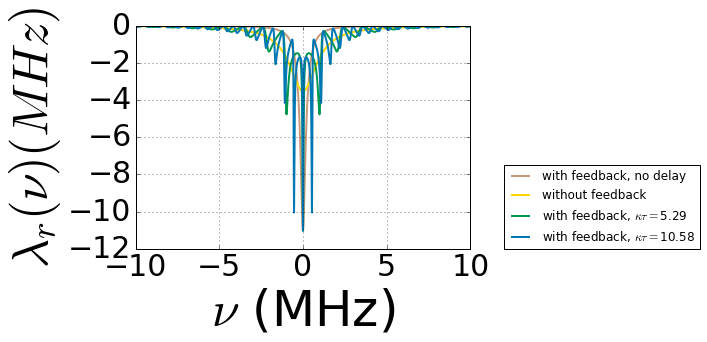

In [79]:
%matplotlib inline
from pylab import *
from sympy.solvers import solve
from sympy import Symbol
from ipywidgets import interactive
from IPython.display import display
import ipywidgets as widgets
from sympy.functions import exp

def pyrag_plot(freqmin,freqmax,freqres,kappa,rb,L,delta,phi,ktau,theta,x,tausep):
    
    colors={'brown':(200/255.,154/255.,125/255.),\
        'green':(0,151/255.,78/255.),\
        'blue':(0,120/255.,180/255.),\
        'yellow':(1., 215/255., 0),\
        'black':(0.,0.,0.)}
    
    kappa = 2*pi*kappa
    k = 2*kappa*sqrt(rb*(1-rb)*(1-L/100))
    nu = linspace(freqmin,freqmax,freqres)
    
    plt.figure("Pyragas plot")
    Squeez = Squeezing_spectrum(kappa,rb,L,delta,phi,ktau,theta,x,nu)
    plt.plot(nu,Squeez[:,0],linewidth = 2.0,color = colors['brown'],label = 'with feedback, no delay')
    plt.hold(True)
    plt.figure("Pyragas plot")
    plt.plot(nu,Squeez[:,2],linewidth = 2.0,color = colors['yellow'],label = 'without feedback')
    ktau = ktau+tausep
    Squeez = Squeezing_spectrum(kappa,rb,L,delta,phi,ktau,theta,x,nu)
    plt.plot(nu,Squeez[:,0],linewidth = 2.0,color = colors['green'],label = 'with feedback, $\kappa\\tau= $%.2f' % ktau)
    plt.figure("Pyragas plot")
    ktau = ktau+tausep
    Squeez = Squeezing_spectrum(kappa,rb,L,delta,phi,ktau,theta,x,nu)
    plt.plot(nu,Squeez[:,0],linewidth = 2.0,color = colors['blue'],label = 'with feedback, $\kappa\\tau=$%.2f' % ktau)
    plt.hold(False)
    plt.xlabel('$\\nu$ (MHz)',fontsize = 50.0)
    plt.ylabel('$\lambda_{r}(\\nu) (MHz)$',fontsize = 50.0)
    plt.legend(loc = (1.1,0))
    plt.grid(True)
    plt.xticks(fontsize = 30.)
    plt.yticks(fontsize = 30.)
    plt.show()

    
#Squeezing_spectrum(kappa,rb,L,delta,phi,ktau,theta,x,nu)
freqmin_box  = widgets.FloatText(value = -10, description='$\\nu_{min}$')
freqmax_box  = widgets.FloatText(value = 10, description='$\\nu_{max}$')
freqres_box  = widgets.IntText(value = 100000, description='$N_{\\nu}$')
kappa_box    = widgets.FloatText(value = 1, description='$\kappa (2\pi$ MHz$)$')
rb_slider    = widgets.FloatSlider(value = 0.46, min=0., max=1., step=0.01, description='$\kappa_b (\kappa)$')
L_slider     = widgets.FloatSlider(value = 5., min=0., max=100., step=1., description='$L (\%)$')
phi_slider   = widgets.FloatSlider(value = 1, min=-1., max=1., step=0.01, description='$\phi (\pi)$')
ktau_slider  = widgets.FloatSlider(value = 0, min=0., max=8., step=0.01, description='$\kappa\\tau$')
delta_slider = widgets.FloatSlider(value = 0, min=-1., max=1., step=0.01, description='$\Delta (\kappa)$')
x_slider     = widgets.FloatSlider(value = 0.0032, min=0., max=2., step=0.01, description='$|\epsilon| (\kappa)$')
theta_slider = widgets.FloatSlider(value = 1, min=0., max=2., step=0.01, description='$\\theta^\prime-\\theta$')
tausep_slider = widgets.FloatSlider(value = 1, min=0., max=6., step=0.01, description='$\kappa\\tau$ separation')

pyrag = interactive(pyrag_plot,freqmin=freqmin_box,freqmax=freqmax_box,freqres=freqres_box,kappa=kappa_box,rb = rb_slider,\
                    L=L_slider,delta=delta_slider,phi = phi_slider,ktau = ktau_slider,theta=theta_slider,x = x_slider,\
                    tausep=tausep_slider)
display(pyrag)


In [ ]:
# tau case NOT STABLE!!!!!

from pylab import *
kappa = 20.*pi
#rb    = .46
rb    = linspace(.5,1.0,10000)
L     = 5.
k     = 2*sqrt(rb*(1-rb)*(1-L/100.))*kappa
#eps   = linspace(0.,0.1,500)*kappa
eps = 0.2*kappa
x = eps/kappa


#print("change in stability for the resonant case: %.4f $\kappa$" % epsres)

colors={'brown':(200/255.,154/255.,125/255.),\
        'green':(0,151/255.,78/255.),\
        'blue':(0,120/255.,180/255.),\
        'yellow':(1., 215/255., 0),\
        'black':(0.,0.,0.)}

#figure("Squeezing")
f,spl = plt.subplots(1,3)
for i in range(0,3):
    x = 0.15*(i+1)
    eps = x*kappa
    nu = sqrt(k**2-(kappa-eps)**2)
    tau = (np.arccos((eps-kappa)/k)+pi)/nu

    res    = (kappa-k-eps)**2/(4*(kappa-k+eps)**2)+4*eps*L/100.*kappa*(1-rb)/(4*(kappa-k+eps)**2)
    offres = (kappa-k*cos(nu*tau)-eps)**2/(4*(kappa-k*cos(nu*tau)+eps)**2)+4*eps*L/100.*kappa*(1-rb)/(4*(kappa-k+eps)**2)
    
    spl[i].set_title("$|\epsilon|=%.2f \kappa$" % x,fontsize=30)
    spl[i].plot(rb,10*log10(res),label = "$\kappa\\tau, \\nu = 0$",linewidth = 2.0,color = colors["brown"])
    spl[i].hold(True)
    spl[i].plot(rb,10*log10(offres),label = "$\kappa\\tau_s, \\nu_s$",linewidth = 2.0,color = colors["green"])
    spl[i].legend(loc = "best",fontsize = 20)
    spl[i].set_xlim(0.5,1)
    spl[i].tick_params(labelsize=20)
    #spl[i].set_yticklabels((),fontsize = 20)
    #plt.ylim(.24,.25)
    spl[i].grid(True)
    spl[i].set_xlabel("$\kappa_b/\kappa$",fontsize = 40)
    spl[i].set_ylabel("Best squeezing (dB)",fontsize = 30.)
    spl[i].hold(False)
    spl[i].set_ylim(-30,0)

eps = kappa-2*kappa*sqrt(rb*(1-rb)*(1-L))
epsres  = (kappa-k)/kappa
#epsores = (kappa-k*cos(nu*tau))/kappa
#figure("optimal epsilon")
#plt.plot(rb,epsres,label = "resonant")
#plt.plot(rb,epsores,label = "off-resonant")
#plt.legend(loc = "best")
#plt.xlim(0.5,1)
#grid(True)
plt.show()

In [7]:
from numpy import *
from sympy import Symbol
from sympy import sqrt
from sympy.solvers import solve

kapb = Symbol("r_b")
rb,rc = solve(2*sqrt(kapb*(1-kapb))-1/2.,kapb)
print(rb,rc)

0.0669872981077807 0.933012701892219


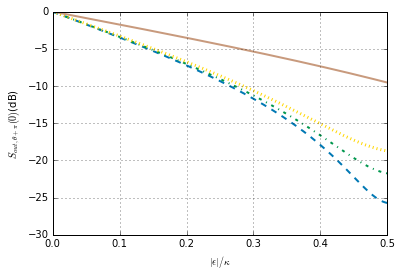

In [22]:
%matplotlib inline
from pylab import *

kappa = 20.*pi
rb    = 0.933012701892219
L = 2.
delta = 0.
phi = 1.
ktau = 0.
theta = 1.
leng = 1000
x = linspace(0,.5,1000)
nu = 0.

colors={'brown':(200/255.,154/255.,125/255.),\
        'green':(0,151/255.,78/255.),\
        'blue':(0,120/255.,180/255.),\
        'yellow':(1., 215/255., 0),\
        'black':(0.,0.,0.)}

Squeez = Squeezing_spectrum(kappa,rb,L,delta,phi,ktau,theta,x,nu,leng)
plt.plot(x,Squeez[:,0],linewidth = 2.0,label = "$L=2\%$",linestyle = "dashed", color = colors["blue"])
plt.hold(True)
L = 5.
Squeez = Squeezing_spectrum(kappa,rb,L,delta,phi,ktau,theta,x,nu,leng)
plt.plot(x,Squeez[:,0],linewidth = 2.0,label = "$L=5\%$",linestyle = "dashdot", color = colors["green"])
L = 10.
Squeez = Squeezing_spectrum(kappa,rb,L,delta,phi,ktau,theta,x,nu,leng)
plt.plot(x,Squeez[:,0],linewidth = 3.0,label = "$L=10\%$",linestyle = "dotted", color = colors["yellow"])
plt.plot(x,Squeez[:,2],linewidth = 2.0,label = "$L=10\%$",linestyle = "solid", color = colors["brown"])
plt.grid(True)
plt.xlabel("$|\epsilon|/\kappa$")
plt.ylabel("$S_{out,\\theta+\pi}(0)$(dB)")